In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("voice.csv")

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
df.shape

(3168, 21)

In [5]:
df.groupby(['label']).size() ##equal no. of males and females in the dataframe

label
female    1584
male      1584
dtype: int64

In [6]:
df.isnull().sum() ##checking to see if any null values present 

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

# Data Analysis 

<IPython.core.display.Javascript object>


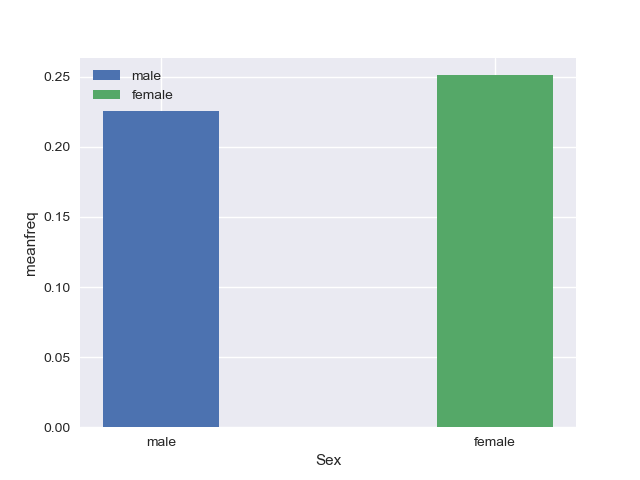

In [7]:
sns.set()
male=df.loc[df['label']=='male'].meanfreq
female=df.loc[df['label']=='female'].meanfreq
plt.bar('male',male,width=0.35)
plt.bar('female',female,width=0.35)
plt.ylabel('meanfreq')
plt.xlabel('Sex')
plt.legend(('male','female'))

<IPython.core.display.Javascript object>


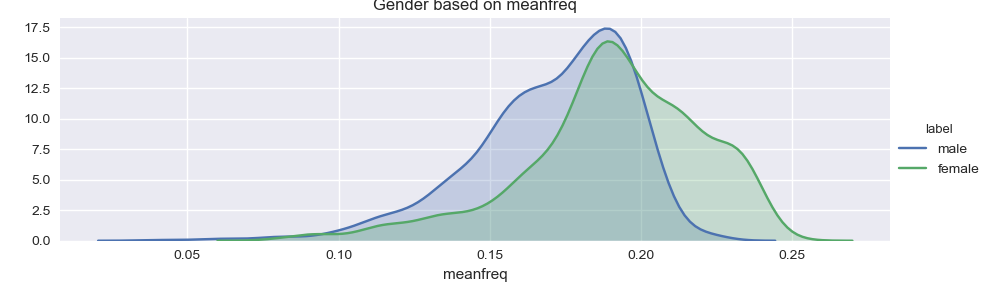

Text(0.5,1,'Gender based on meanfreq')

In [8]:
graph = sns.FacetGrid(df, hue="label",aspect=3)
graph.map(sns.kdeplot,'meanfreq',shade= True)
graph.add_legend()
plt.title("Gender based on meanfreq")

<IPython.core.display.Javascript object>


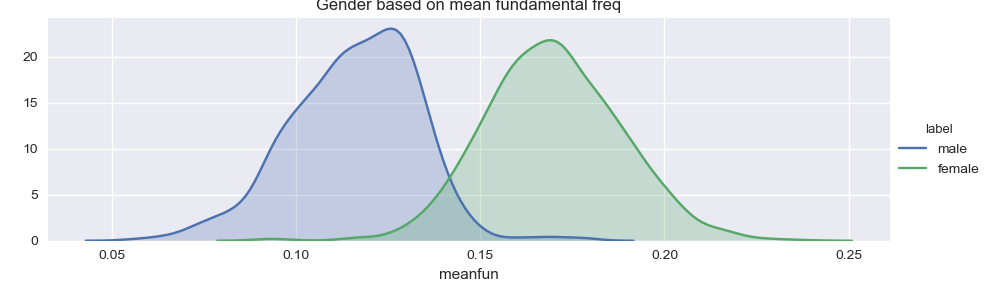

Text(0.5,1,'Gender based on mean fundamental freq')

In [10]:
graph = sns.FacetGrid(df, hue="label",aspect=3)
graph.map(sns.kdeplot,'meanfun',shade= True)
graph.add_legend()
plt.title("Gender based on mean fundamental freq")

<IPython.core.display.Javascript object>


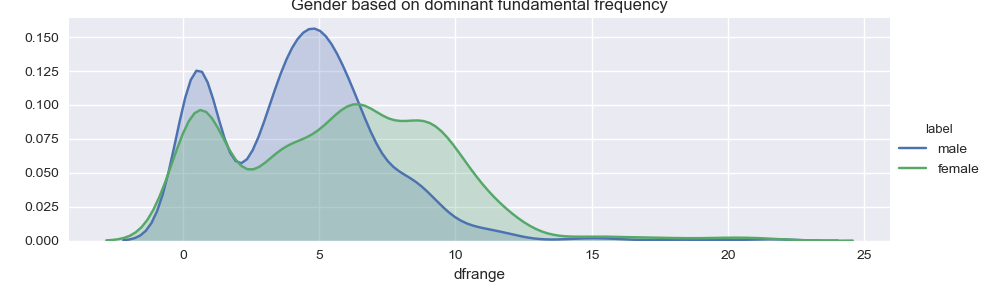

Text(0.5,1,'Gender based on dominant fundamental frequency')

In [11]:
graph = sns.FacetGrid(df, hue="label",aspect=3)
graph.map(sns.kdeplot,'dfrange',shade= True)
graph.add_legend()
plt.title("Gender based on dominant fundamental frequency")

<IPython.core.display.Javascript object>


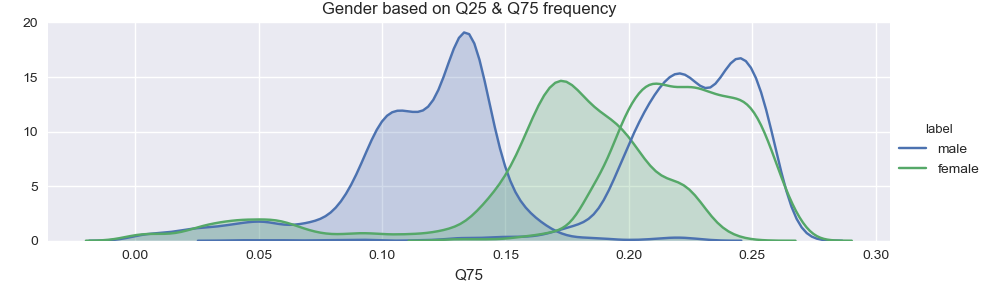

Text(0.5,1,'Gender based on Q25 & Q75 frequency')

In [21]:
graph = sns.FacetGrid(df, hue="label",aspect=3)
graph.map(sns.kdeplot,'Q25',shade= True)
graph.map(sns.kdeplot,'Q75',shade=False)
graph.add_legend()
plt.title("Gender based on Q25 & Q75 frequency")

In [22]:
df['label'].replace(['male','female'],[0,1],inplace=True)

In [23]:
Y=df['label']
df.drop(['label'],axis=1,inplace=True)
X=df

# Using Random Forest to get a feature importance 

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [30]:
Y=np.asarray(Y)

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,max_features=20,random_state=0)

In [71]:
import sklearn.linear_model
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.2)

In [73]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [74]:
rf.score(x_test,y_test)

0.9826498422712934

In [43]:
importance=rf.feature_importances_

In [45]:
columns=df.columns

<IPython.core.display.Javascript object>


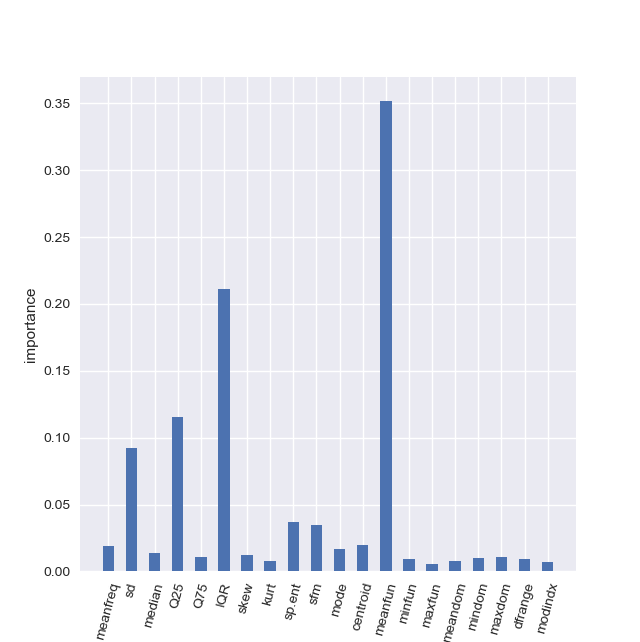

Text(0,0.5,'importance')

In [59]:
plt.figure()
plt.bar(columns, importance, width=0.5, tick_label=columns)
plt.xticks(rotation=75, fontsize=10)
plt.xlabel('features')
plt.ylabel('importance')

# Hence we can see there are 4 major important features i.e Mean fundamental frequency, Inter Quartile Range, Q25, and SD

Hence the important features we are gonna work with ar meanfun, IQR, SD, Q25, sp.ent, sfm & meanfreq

# Running SVM with default hyperparameters 

In [78]:
svmX=X[:,[0,1,3,5,8,9,11,12]]

In [82]:
svmx_train,svmx_test,svmy_train,svmy_test=sklearn.model_selection.train_test_split(svmX,Y,test_size=0.2)

In [84]:
from sklearn.svm import SVC
svc=SVC() 
svc.fit(svmx_train,svmy_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [85]:
svc.score(svmx_test,svmy_test)

0.9700315457413249

# Changing hyperparameters 

In [86]:
## Linear kernel 
svc=SVC(kernel='linear')
svc.fit(svmx_train,svmy_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [87]:
svc.score(svmx_test,svmy_test)

0.9684542586750788

In [88]:
##Polynomial kernel
svc=SVC(kernel='poly')
svc.fit(svmx_train,svmy_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [89]:
svc.score(svmx_test,svmy_test)

0.944794952681388

In [93]:
##Sigmmoid kernel
svc=SVC(kernel='sigmoid')
svc.fit(svmx_train,svmy_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [94]:
svc.score(svmx_test,svmy_test)

0.8533123028391167

In [95]:
## performing cross-validation 

In [96]:
from sklearn.cross_validation import cross_val_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [99]:
svc=SVC()
svclinear=SVC(kernel='linear')
svcpoly=SVC(kernel='poly')
svcsigmoid=SVC(kernel='sigmoid')

In [101]:
scores = cross_val_score(svc, svmX, Y, cv=10, scoring='accuracy') 
scoreslinear = cross_val_score(svclinear, svmX, Y, cv=10, scoring='accuracy') 
scorespoly = cross_val_score(svcpoly, svmX, Y, cv=10, scoring='accuracy') 
scoressigmoid = cross_val_score(svcsigmoid, svmX, Y, cv=10, scoring='accuracy') 


In [113]:
l_label=[]
l_label.extend(['rbf','linear','poly','sigmoid'])

In [110]:
l=[]
l.extend([scores.mean(),scoreslinear.mean(),scorespoly.mean(),scoressigmoid.mean()])
print(l)

[0.9659422020539765, 0.9678250139320118, 0.9416606958044742, 0.8410058912506966]


<IPython.core.display.Javascript object>


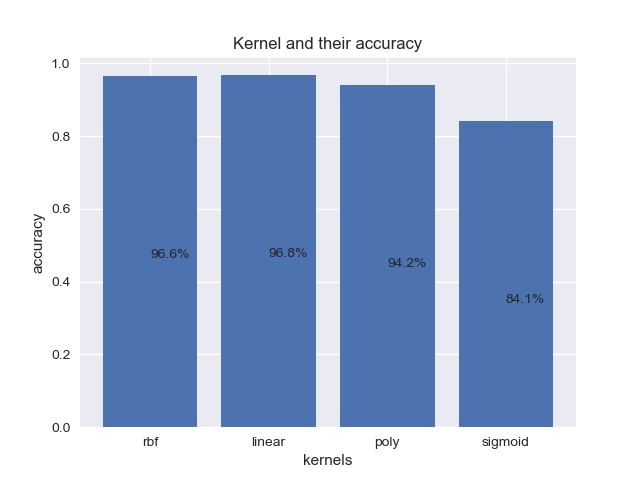

In [133]:
lst=['96.6%','96.8%','94.2%','84.1%'] ##create labels
plt.figure()
plt.bar(l_label,l)
plt.xlabel('kernels')
plt.ylabel('accuracy')
plt.title('Kernel and their accuracy')
for i in range(len(l)):
    plt.text(x=i,y=l[i]-0.5,s= lst[i], size = 10)
